In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from utils.paths import DATA_RAW_DIR

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import ipywidgets as widgets
from IPython.display import display

In [2]:
path_jugadores = str(DATA_RAW_DIR / 'jugadores_cebollitas.csv')

print('Path:', path_jugadores)
print('Does path exist?', Path(path_jugadores).exists())

df_jugadores = pd.read_csv(path_jugadores, sep=',', encoding='utf-8')
df_jugadores.head()

Path: /Users/jssdev/Dev/Learning/Platzi/platzi-machine-learning/data/raw/jugadores_cebollitas.csv
Does path exist? True


,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047


In [3]:
X = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
pca = PCA(n_components=2)
componentes = pca.fit_transform(X_scaled)


In [10]:
df_jugadores['PC1'] = componentes[:,0]
df_jugadores['PC2'] = componentes[:,1]

<Axes: xlabel='PC1', ylabel='PC2'>

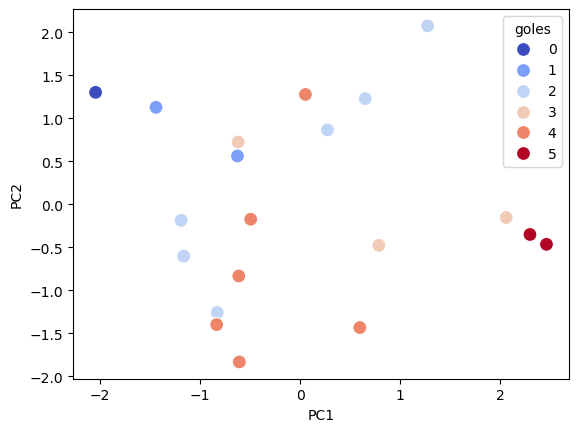

In [11]:
sns.scatterplot(x='PC1', y='PC2', data=df_jugadores, hue='goles', palette='coolwarm', s=100)

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(X_scaled)

<Axes: xlabel='PC1', ylabel='PC2'>

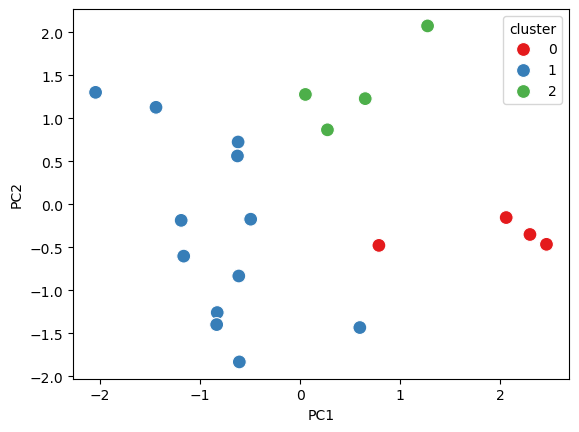

In [13]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='Set1', data=df_jugadores, s=100)

In [14]:
varianza = pca.explained_variance_ratio_

print(f"Varianza explicada por PC1: {varianza[0]:.2%}")
print(f"Varianza explicada por PC2: {varianza[1]:.2%}")
print(f"Varianza total explicada: {varianza.sum():.2%}")

Varianza explicada por PC1: 38.65%
Varianza explicada por PC2: 28.39%
Varianza total explicada: 67.04%


In [ ]:

def explorar_componentes(eje_x, eje_y):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=eje_x, y=eje_y, hue='cluster', data=df_jugadores, palette='Set2', s=100)
    plt.title(f'Clusters en espacio {eje_x} vs {eje_y}')
    plt.grid(True)
    plt.show()

widgets.interactive(
    explorar_componentes,
    eje_x=['PC1', 'PC2'],
    eje_y=['PC1', 'PC2'])

interactive(children=(Dropdown(description='eje_x', options=('PC1', 'PC2'), value='PC1'), Dropdown(description…